In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as oj
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.express as px
import plotly.graph_objects as go

from get_pose_mat_wide import get_pose_mat_wide

In [36]:
root_folder = r'/Users/yang/Documents/Wilbrecht_Lab/data4analysis/processed_tracks'
combined_df = pd.read_csv(oj(root_folder, 'combined_df.csv'))

In [37]:
print(combined_df.shape)
combined_df.head()

(1643207, 39)


Unnamed: 0      Head x     Head y      Neck x     Neck y     Torso x  \
0           0  192.796951  28.332069  195.778046  23.389879  199.605362   
1           1  192.110931  35.688915  195.196640  28.520031  199.130478   
2           2  191.869446  43.421238  192.651031  36.414017  196.267807   
3           3  191.725861  48.858665  192.430756  43.865223  195.759293   
4           4  191.152802  56.947693  191.896271  51.915794  195.551804   

     Torso y  Tailhead x  Tailhead y  warped Head x  ...  Head velocity  \
0  11.785733  203.450699    6.817648     273.703649  ...       0.000000   
1  16.665558  203.038986    7.328142     274.235963  ...     221.662861   
2  24.506279  199.963287   12.590609     274.606919  ...     232.082780   
3  32.090069  199.434418   20.331448     275.048460  ...     163.179690   
4  39.622505  199.436478   27.578400     276.035795  ...     243.279027   

   Neck velocity  Torso velocity  Tailhead velocity  Head acceleration  \
0       0.000000        0.000000           0.000000        6649.885821   
1     154.889769      147.086311          19.674870         312.597565   
2     248.828496      250.408892         182.860955       -2067.092682   
3     223.633843      228.024581         232.766541        2402.980104   
4     242.048832      226.058807         217.408570          -1.766716   

   Neck acceleration  Torso acceleration  Tailhead acceleration  animal  \
0        4646.693069         4412.589343             590.246091  RRM028   
1        2818.161807         3099.677421            4895.582548  RRM028   
2        -755.839578         -671.529336            1497.167579  RRM028   
3         552.449666          -58.973204            -460.739103  RRM028   
4        -338.857171          218.826253             883.502202  RRM028   

  session  
0  Day141  
1  Day141  
2  Day141  
3  Day141  
4  Day141  

[5 rows x 39 columns]

(array([8.45977e+05, 1.09777e+05, 3.80550e+04, 3.12970e+04, 7.81170e+04,
        8.00080e+04, 8.24610e+04, 8.90120e+04, 7.39950e+04, 4.22010e+04,
        1.27720e+04, 1.68170e+04, 3.73960e+04, 4.24880e+04, 2.57040e+04,
        7.45000e+03, 1.30500e+03, 4.31000e+02, 1.58300e+03, 1.86200e+03,
        9.08000e+02, 4.75000e+02, 3.32000e+02, 2.03000e+02, 1.50000e+02,
        1.82000e+02, 1.46000e+02, 2.57000e+02, 1.75000e+02, 2.02000e+02]),
 array([  0.        ,  16.66666667,  33.33333333,  50.        ,
         66.66666667,  83.33333333, 100.        , 116.66666667,
        133.33333333, 150.        , 166.66666667, 183.33333333,
        200.        , 216.66666667, 233.33333333, 250.        ,
        266.66666667, 283.33333333, 300.        , 316.66666667,
        333.33333333, 350.        , 366.66666667, 383.33333333,
        400.        , 416.66666667, 433.33333333, 450.        ,
        466.66666667, 483.33333333, 500.        ]),
 <BarContainer object of 30 artists>)

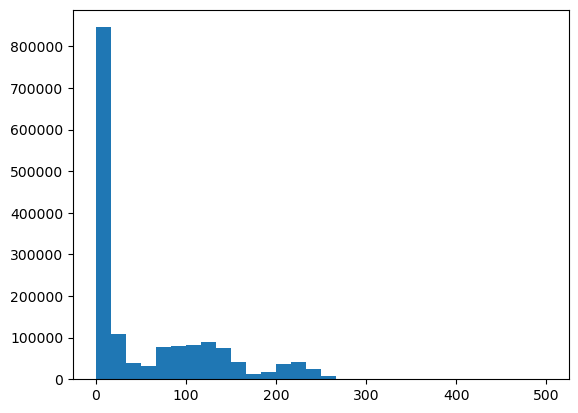

In [38]:
plt.hist(combined_df['Head velocity'], bins=30, range=(0, 500))

In [39]:
def plot_assigned_tracks(df, condition_func):
    '''
    Plot the trials that satisfy the given condition
    
    PART I: Iterate each row in df, extract trial-wise features and record them into result_df
    '''
    current_trial_num = np.nan
    current_session = np.nan
    current_animal = np.nan
    current_bonsai_decision = np.nan
    current_decision = np.nan
    current_restaurant = np.nan
    bonsai_decision = np.nan
    decision = np.nan
    sum_of_speed = 0
    speed_count = 0
    
    #bonsai_decision_list = []
    decision_list = []
    straight_walking_speed_list =[]
    animal_list = []
    session_list = []
    trial_list = []

    for index, row in df.iterrows():
        bonsai_decision = row['label']
        decision = row['decision']
        trial_num = row['trial']
        animal = row['animal']
        session = row['session']
        speed = np.sqrt(row['Head velocity x']**2 + row['Head velocity y']**2)

        restaurant = row['restaurant']
        
    
        if trial_num != current_trial_num: # Start of a new trial
            if speed_count != 0:
                average_speed = sum_of_speed/speed_count
            else:
                average_speed = np.nan

            if current_bonsai_decision == 'collection':
                current_bonsai_decision = 'ACC'
            
            if not np.isnan(current_trial_num):
                if condition_func(current_decision, current_bonsai_decision, average_speed, current_restaurant, current_animal, current_session, current_trial_num):
                    #bonsai_decision_list.append(current_bonsai_decision)
                    decision_list.append(current_decision)
                    straight_walking_speed_list.append(average_speed)
                    animal_list.append(current_animal)
                    session_list.append(current_session)
                    trial_list.append(current_trial_num)

            current_restaurant = restaurant
            current_bonsai_decision = np.nan    
            current_decision = np.nan
            current_trial_num = trial_num 
            current_session = session
            current_animal = animal
            sum_of_speed = 0
            speed_count = 0
        
        if not pd.isna(decision):
            current_decision = decision    
        if not pd.isna(bonsai_decision):
            current_bonsai_decision = bonsai_decision
        
        if pd.isna(current_decision) and (speed < 300):
            sum_of_speed += speed
            speed_count += 1
    

    result_df = pd.DataFrame({
        #'bonsai decision': bonsai_decision_list,
        'decision': decision_list,
        'straight_walking_speed': straight_walking_speed_list,
        'animal': animal_list,
        'session': session_list,
        'trial': trial_list
    })
    plt.hist(straight_walking_speed_list, bins=50)
    plt.show()
    
    '''
    PART II: Iterate through each row in result_df, locate them in df and then plot them.
    '''
    # Extract animal, session, and trial info from the decision dataframe
    decision_info = result_df[['animal', 'session', 'trial']]
    filtered_df = df[
        df[['animal', 'session', 'trial']].apply(tuple, axis=1).isin(decision_info.apply(tuple, axis=1))
    ]
    
    # plot each trial using plotly
    plt.figure(figsize=(10, 10))

    trial_palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))
    trial_palette_dict = {trial_num: color for trial_num, color in zip(filtered_df['trial'].unique(), trial_palette)}
    
    decision_palette = sns.color_palette('deep', n_colors=len(result_df['decision'].unique()))
    decision_palette_dict = {decision: color for decision, color in zip(filtered_df['decision'].unique(), decision_palette)}
    decision_palette_dict = {
        "ACC": (0, 1, 0),  # Green with transparency
        "REJ": (1, 0, 0),  # Red with transparency
        "quit": (0, 0, 1),  # Blue with transparency
        "T-Entry": (1, 1, 1), # black
        np.nan: (1, 1, 1) # black
    }
    fig = go.Figure()
    
    # Iterate through each row in result_df
    for _, row in result_df.iterrows():
        # Extract animal, session, and trial information
        decision, animal, session, trial = row['decision'], row['animal'], row['session'], row['trial']
        
        # Filter df for the current trial
        filtered_trial = df[(df['animal'] == animal) & (df['session'] == session) & (df['trial'] == trial)]
        
        # Determine the color for the current trial
        color = 'rgba' + str(tuple(int(c * 255) for c in decision_palette_dict[decision]) + (0.2,))
        
        # Add the trial data to the plot
        fig.add_trace(go.Scatter(
            x=filtered_trial['warped Head x'],
            y=filtered_trial['warped Head y'],
            mode='lines',
            line=dict(color=color, width=0.5),
            showlegend=False
        ))
    
    fig.update_layout(
        xaxis_title='warped Head x',
        yaxis_title='warped Head y',
        yaxis=dict(autorange='reversed'),
        #width = 600,
        #height = 1000
    )
    
    # Adding vertical and horizontal lines and text annotations
    fig.add_vline(x=282, line=dict(color='red', dash='dash', width=1))
    fig.add_annotation(x=285, y=142, text='REJ', showarrow=False, font=dict(color='red'), xanchor='right', yanchor='top')

    fig.add_vline(x=309, line=dict(color='red', dash='dash', width=1))
    fig.add_annotation(x=314, y=142, text='ACC', showarrow=False, font=dict(color='red'), xanchor='right', yanchor='top')

    fig.add_hline(y=46, line=dict(color='red', dash='dash', width=1))
    fig.add_annotation(x=333, y=46, text='T_Entry', showarrow=False, font=dict(color='red'), xanchor='right', yanchor='bottom')

    fig.show()

In [40]:
def interactive_analysis(combined_df, condition_func):
    """
    Use the slider to adjust the start and length of the range of combined_df.
    Then plot the trials that satisfy the given condition
    
    Parameters:
    - combined_df: The DataFrame to analyze.
    - condition_func: A lambda function to determine the condition for plotting.
    """
    
    # Function to update the selected range based on slider values
    def update_range(range_value, interval):
        global selected_range
        global df_subset
        selected_range = [range_value, range_value + interval]
        df_subset = combined_df.iloc[selected_range[0]:selected_range[1]]
        print(f"Selected range: {selected_range}")

    # Create slider widgets
    range_slider = widgets.IntSlider(value=0, min=0, max=len(combined_df), step=100, description='Start:')
    interval_slider = widgets.IntSlider(value=10000, min=0, max=len(combined_df), step=100, description='Length:')
    interactive_widget = widgets.interactive(update_range, range_value=range_slider, interval=interval_slider)
    display(interactive_widget)

    # Create an output widget for the plots
    output = widgets.Output()

    # Button to trigger further analysis
    analyze_button = widgets.Button(description="Plot")

    # Function to handle button click
    def on_analyze_button_clicked(b):
        with output:
            clear_output(wait=True)  # Clear previous plots
            plot_assigned_tracks(df_subset, condition_func)
    

    # Link the button to the handler function
    analyze_button.on_click(on_analyze_button_clicked)

    # Display the button and output widget
    display(analyze_button)
    display(output)
    

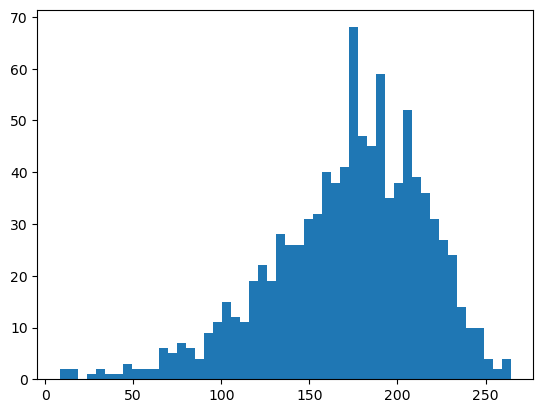

<Figure size 1000x1000 with 0 Axes>

In [41]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant, animal, session, trial: (
    True
    )

plot_assigned_tracks(combined_df[1:100000], condition_func)

Straight walking average speed is not affecting bonsai vs sleap decision.
Some implication from the trajectories. see in notion

In [42]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant, animal, session, trial: (
    (bonsai_decision == 'quit' and sleap_decision == 'REJ')
    )

interactive_analysis(combined_df, condition_func)

interactive(children=(IntSlider(value=0, description='Start:', max=1643207, step=100), IntSlider(value=10000, …

Button(description='Plot', style=ButtonStyle())

Output()

In [43]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant, animal, session, trial: (
    (bonsai_decision == 'ACC' and sleap_decision == 'REJ')
    )

interactive_analysis(combined_df, condition_func)

interactive(children=(IntSlider(value=0, description='Start:', max=1643207, step=100), IntSlider(value=10000, …

Button(description='Plot', style=ButtonStyle())

Output()

In [44]:
condition_func = lambda sleap_decision, bonsai_decision, average_speed, restaurant, animal, session, trial: (
    (bonsai_decision == 'REJ' and sleap_decision == 'ACC')
    )

interactive_analysis(combined_df, condition_func)

interactive(children=(IntSlider(value=0, description='Start:', max=1643207, step=100), IntSlider(value=10000, …

Button(description='Plot', style=ButtonStyle())

Output()